In [ ]:
!wget https://www.fs.usda.gov/rds/archive/products/RDS-2013-0009.4/RDS-2013-0009.4_GPKG.zip

--2021-04-09 13:32:58--  https://www.fs.usda.gov/rds/archive/products/RDS-2013-0009.4/RDS-2013-0009.4_GPKG.zip
Resolving www.fs.usda.gov (www.fs.usda.gov)... 23.199.31.249, 2600:1402:6800:2a6::b91, 2600:1402:6800:286::b91
Connecting to www.fs.usda.gov (www.fs.usda.gov)|23.199.31.249|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 160370416 (153M) [application/x-zip-compressed]
Saving to: ‘RDS-2013-0009.4_GPKG.zip.1’

RDS-2013-0009.4_GPK 100%[===================>] 152.94M  5.16MB/s    in 29s     

2021-04-09 13:33:29 (5.19 MB/s) - ‘RDS-2013-0009.4_GPKG.zip.1’ saved [160370416/160370416]



In [ ]:
!unzip RDS-2013-0009.4_GPKG.zip

Archive:  RDS-2013-0009.4_GPKG.zip
replace Data/FPA_FOD_20170508.gpkg? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
  inflating: Data/FPA_FOD_20170508.gpkg  
  inflating: _metadata_RDS-2013-0009.4.xml  
  inflating: Supplements/FPA_FOD_Source_List.pdf  
  inflating: _fileindex_RDS-2013-0009.4.html  
  inflating: _metadata_RDS-2013-0009.4.html  


In [ ]:
%%time 
# Important library for many geopython libraries
!apt install gdal-bin python-gdal python3-gdal 
# Install rtree - Geopandas requirment
!apt install python3-rtree 
# Install Geopandas
!pip install git+git://github.com/geopandas/geopandas.git
# Install descartes - Geopandas requirment
!pip install descartes 
# Install Folium for Geographic data visualization
!pip install folium
# Install plotlyExpress
!pip install plotly_express
!pip3 install contextily

In [ ]:
import pandas as pd
import geopandas
import matplotlib.pyplot as plt
import numpy as np
import os

In [ ]:
us_gdf = geopandas.read_file("/content/Data/FPA_FOD_20170508.gpkg", layer='Fires')

In [ ]:
us_gdf.describe()

,FOD_ID,FIRE_YEAR,DISCOVERY_DOY,STAT_CAUSE_CODE,CONT_DOY,FIRE_SIZE,LATITUDE,LONGITUDE,OWNER_CODE
count,1.880465e+06,1.880465e+06,1.880465e+06,1.880465e+06,988934.000000,1.880465e+06,1.880465e+06,1.880465e+06,1.880465e+06
mean,5.484020e+07,2.003710e+03,1.647191e+02,5.979037e+00,172.656766,7.452016e+01,3.678121e+01,-9.570494e+01,1.059658e+01
std,1.011963e+08,6.663099e+00,9.003891e+01,3.483860e+00,84.320348,2.497598e+03,6.139031e+00,1.671694e+01,4.404662e+00
min,1.000000e+00,1.992000e+03,1.000000e+00,1.000000e+00,1.000000,1.000000e-05,1.793972e+01,-1.788026e+02,0.000000e+00
25%,5.055000e+05,1.998000e+03,8.900000e+01,3.000000e+00,102.000000,1.000000e-01,3.281860e+01,-1.103635e+02,8.000000e+00
50%,1.067761e+06,2.004000e+03,1.640000e+02,5.000000e+00,181.000000,1.000000e+00,3.545250e+01,-9.204304e+01,1.400000e+01
75%,1.910639e+07,2.009000e+03,2.300000e+02,9.000000e+00,232.000000,3.300000e+00,4.082720e+01,-8.229760e+01,1.400000e+01
max,3.003484e+08,2.015000e+03,3.660000e+02,1.300000e+01,366.000000,6.069450e+05,7.033060e+01,-6.525694e+01,1.500000e+01


In [ ]:
us_gdf.columns

Index(['FOD_ID', 'FPA_ID', 'SOURCE_SYSTEM_TYPE', 'SOURCE_SYSTEM',
       'NWCG_REPORTING_AGENCY', 'NWCG_REPORTING_UNIT_ID',
       'NWCG_REPORTING_UNIT_NAME', 'SOURCE_REPORTING_UNIT',
       'SOURCE_REPORTING_UNIT_NAME', 'LOCAL_FIRE_REPORT_ID',
       'LOCAL_INCIDENT_ID', 'FIRE_CODE', 'FIRE_NAME',
       'ICS_209_INCIDENT_NUMBER', 'ICS_209_NAME', 'MTBS_ID', 'MTBS_FIRE_NAME',
       'COMPLEX_NAME', 'FIRE_YEAR', 'DISCOVERY_DATE', 'DISCOVERY_DOY',
       'DISCOVERY_TIME', 'STAT_CAUSE_CODE', 'STAT_CAUSE_DESCR', 'CONT_DATE',
       'CONT_DOY', 'CONT_TIME', 'FIRE_SIZE', 'FIRE_SIZE_CLASS', 'LATITUDE',
       'LONGITUDE', 'OWNER_CODE', 'OWNER_DESCR', 'STATE', 'COUNTY',
       'FIPS_CODE', 'FIPS_NAME', 'geometry'],
      dtype='object')

In [ ]:
len(us_gdf)

1880465

In [ ]:
len(us_gdf.FOD_ID.unique())

1880465

In [ ]:
us_gdf = us_gdf[['FOD_ID','FIRE_YEAR', 'DISCOVERY_DATE', 'DISCOVERY_DOY',
       'STAT_CAUSE_DESCR', 'FIRE_SIZE', 'STATE', 'geometry']]

In [ ]:
virginia=us_gdf[us_gdf['STATE']=='VA']

In [ ]:
del us_gdf

In [ ]:
virginia.head()

,FOD_ID,FIRE_YEAR,DISCOVERY_DATE,DISCOVERY_DOY,STAT_CAUSE_DESCR,FIRE_SIZE,STATE,geometry
3474,3493,2005,2005-03-19T00:00:00+00:00,78,Arson,293.0,VA,POINT (-79.07167 38.55778)
3482,3501,2005,2005-03-30T00:00:00+00:00,89,Arson,1.0,VA,POINT (-79.38333 38.30000)
3504,3523,2005,2005-04-03T00:00:00+00:00,93,Miscellaneous,11.1,VA,POINT (-79.02944 38.74139)
3505,3524,2005,2005-04-09T00:00:00+00:00,99,Arson,0.1,VA,POINT (-82.44778 36.85472)
3513,3532,2005,2005-05-28T00:00:00+00:00,148,Miscellaneous,2.5,VA,POINT (-80.20194 37.76028)


In [ ]:
virginia.drop('STATE', axis=1, inplace=True)
virginia.head()

,FOD_ID,FIRE_YEAR,DISCOVERY_DATE,DISCOVERY_DOY,STAT_CAUSE_DESCR,FIRE_SIZE,geometry
3474,3493,2005,2005-03-19T00:00:00+00:00,78,Arson,293.0,POINT (-79.07167 38.55778)
3482,3501,2005,2005-03-30T00:00:00+00:00,89,Arson,1.0,POINT (-79.38333 38.30000)
3504,3523,2005,2005-04-03T00:00:00+00:00,93,Miscellaneous,11.1,POINT (-79.02944 38.74139)
3505,3524,2005,2005-04-09T00:00:00+00:00,99,Arson,0.1,POINT (-82.44778 36.85472)
3513,3532,2005,2005-05-28T00:00:00+00:00,148,Miscellaneous,2.5,POINT (-80.20194 37.76028)


In [ ]:
virginia = virginia.dropna()
virginia.head()

,FOD_ID,FIRE_YEAR,DISCOVERY_DATE,DISCOVERY_DOY,STAT_CAUSE_DESCR,FIRE_SIZE,geometry
3474,3493,2005,2005-03-19T00:00:00+00:00,78,Arson,293.0,POINT (-79.07167 38.55778)
3482,3501,2005,2005-03-30T00:00:00+00:00,89,Arson,1.0,POINT (-79.38333 38.30000)
3504,3523,2005,2005-04-03T00:00:00+00:00,93,Miscellaneous,11.1,POINT (-79.02944 38.74139)
3505,3524,2005,2005-04-09T00:00:00+00:00,99,Arson,0.1,POINT (-82.44778 36.85472)
3513,3532,2005,2005-05-28T00:00:00+00:00,148,Miscellaneous,2.5,POINT (-80.20194 37.76028)


In [ ]:
virginia['lon'] = virginia.geometry.apply(lambda p: p.x)
virginia['lat'] = virginia.geometry.apply(lambda p: p.y)

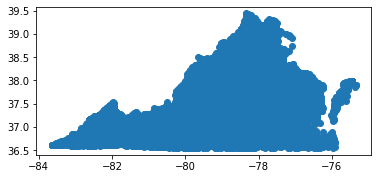

In [ ]:
virginia.plot()

In [ ]:
virginia_nogeom=virginia.drop('geometry', axis=1)

In [ ]:
virginia_nogeom.to_csv("virginia_cleaned.csv",index=False,mode='w')

In [ ]:
len(virginia)

21833

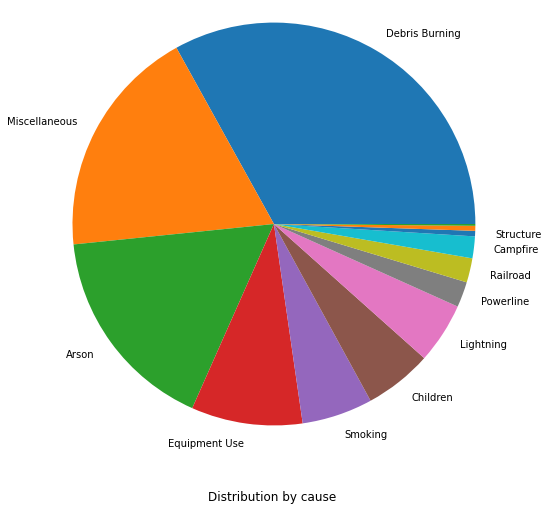

In [ ]:
plt.figure(figsize=(8,8))

cause_df = virginia['STAT_CAUSE_DESCR'].value_counts()

plt.title('Distribution by cause', y=-0.15)
plt.pie(cause_df, labels=list(cause_df.index[:-2]) + ['', '']);
plt.axis('equal');